# **Independent Project 2: More Data, More Visualizations**

### **Student name: Milsort Jeptoo Kemboi**
### **Student pace: part time**
### **Date: 01/09/2024**
### **Instructor name: Samwel Jane & Veronica Isiaho**

# **Problem Statement**

 Karamoja is the most food-insecure region of Uganda. One of the main reasons is the low productivity level of the crops due to intense droughts as well as pest and disease outbreaks. Karamoja (Links to an external site.)Links to an external site.

In Karamoja, several NGOs provide technical support as well as farm inputs to the farmers experiencing extremely low yield. Though, they lack visibility into the overall state of the region and often need to rely on some very local sources of information to prioritize their activities.
Dalberg Data Insights (DDI) has been requested to develop a new food security monitoring tool to support the decision making of one of those NGOs active in Karamoja.

To do so, Dalberg Data Insights developed a methodology to remotely measure the yield of the two main staple crops of the region (i.e. sorghum and maize) based on satellite images. The agri-tech team just ran the model for the 2017 crop season.

## **Research Question**
As a Data Analyst, the agri-tech team is asking you to develop an interactive visualization tool of the results for this first crop season. This visualization tool that you will develop will be used as a first mockup of the Food Security Monitoring tool that DDI will develop for the NGO.
Based on your experience, the team expects you to come up with a first draft within the coming 3 working days. They give you carte blanche in terms of structure and functionalities but they know that the client wants:
At least a map in the dashboard
The possibility of visualizing the results by district or sub-county (two administrative levels used by the NGO)

# **Data source**

**Shapefiles**
Boundaries of Uganda Subcounties
Boundaries of Uganda Districts
Crop Type Map for Sorghum (i.e. position of the Sorghum fields)
Crop Type Map for Maize

**Tables**
Yield and Population per Subcounty
Yield and Population per District

# **Objectives**
**Develop an Interactive Visualization Tool:**

To create a user-friendly dashboard that displays key agricultural data for Karamoja population, including crop yields for sorghum and maize.

**Incorporate Map and Multi-Level Data Visualizations:**

To create a comprehensive and insightful dashboard, integrate maps that visually represent crop distribution and yield metrics across various districts and sub-counties.

**Support Decision-Making:**

Ensure the tool provides actionable insights that can help NGOs make informed decisions on where to focus resources and interventions based on the visualized data.

**Provide Initial Mockup:**

Deliver a first draft of the visualization tool within three working days, demonstrating the core functionalities and design that will be further developed into a full Food Security Monitoring tool.


# **Clean and Prepare the Data for Visualization**
Before any data analysis it is good practice to first look at the data



In [ ]:
## Import necessary libraries

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Load data
district_data = pd.read_csv('Uganda_Karamoja_District_Crop_Yield_Population.csv')
subcounty_data = pd.read_csv('Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')

In [ ]:
## Understanding how the data looks like

print(district_data.head())
print(district_data.info())
print(district_data.describe())

print(subcounty_data.head())
print(subcounty_data.info())
print(subcounty_data.describe())


   OBJECTID     NAME     POP        Area  S_Yield_Ha  M_Yield_Ha  \
0        92     ABIM   90385  2771977106         449        1040   
1        96   AMUDAT  101790  1643582836         205        1297   
2        20  KAABONG  627057  7373606003         279         945   
3        85   KOTIDO  243157  3641539808         331        1148   
4         5   MOROTO  127811  3570160948         128         355   

   Crop_Area_Ha     S_Area_Ha    M_Area_Ha  S_Prod_Tot  M_Prod_Tot  
0   5470.068394   3277.295971  1848.621855     1471506     1922567  
1   5765.443719   2973.423860  2733.661014      609552     3545558  
2  28121.672530  20544.194960  7394.416334     5731830     6987723  
3  53032.649450  50247.443900  1751.372284    16631904     2010575  
4   5954.814048   4741.748776  1190.050606      606944      422468  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------

In [ ]:
# Check for missing values in the district data
missing_values_district = district_data.isnull().sum()
print("Missing values in district data:")
print(missing_values_district)

# Check for missing values in the subcounty data
missing_values_subcounty = subcounty_data.isnull().sum()
print("Missing values in subcounty data:")
print(missing_values_subcounty)


Missing values in district data:
OBJECTID        0
NAME            0
POP             0
Area            0
S_Yield_Ha      0
M_Yield_Ha      0
Crop_Area_Ha    0
S_Area_Ha       0
M_Area_Ha       0
S_Prod_Tot      0
M_Prod_Tot      0
dtype: int64
Missing values in subcounty data:
OBJECTID          0
SUBCOUNTY_NAME    0
DISTRICT_NAME     0
POP               0
Area              0
Karamoja          0
S_Yield_Ha        0
M_Yield_Ha        0
Crop_Area_Ha      0
S_Area_Ha         0
M_Area_Ha         0
S_Prod_Tot        0
M_Prod_Tot        0
dtype: int64


From above, we dont have any missing data from the two tables

In [ ]:
# Check for duplicate values
print("Duplicate values in District Data:")
print(district_data.duplicated().sum())
print("Duplicate values in Subcounty Data:")
print(subcounty_data.duplicated().sum())

Duplicate values in District Data:
0
Duplicate values in Subcounty Data:
0


In [ ]:
# Check for inconsistent data types
print("Data types in District Data:")
print(district_data.dtypes)
print("Data types in Subcounty Data:")
print(subcounty_data.dtypes)

Data types in District Data:
OBJECTID          int64
NAME             object
POP               int64
Area              int64
S_Yield_Ha        int64
M_Yield_Ha        int64
Crop_Area_Ha    float64
S_Area_Ha       float64
M_Area_Ha       float64
S_Prod_Tot        int64
M_Prod_Tot        int64
dtype: object
Data types in Subcounty Data:
OBJECTID            int64
SUBCOUNTY_NAME     object
DISTRICT_NAME      object
POP                 int64
Area                int64
Karamoja           object
S_Yield_Ha        float64
M_Yield_Ha        float64
Crop_Area_Ha      float64
S_Area_Ha         float64
M_Area_Ha         float64
S_Prod_Tot        float64
M_Prod_Tot        float64
dtype: object


 From the above output, the primary inconsistency lies in the **S_Yield_Ha,**  **M_Yield_Ha**, **S_Prod_Tot** and **M_Prod_Tot** columns. In the District Data, these columns are of type **int64**, while in the Subcounty Data, they are of type **float64**

In [ ]:
# Convert S_Prod_Tot and M_Prod_Tot to int64 in Subcounty Data
subcounty_data['S_Prod_Tot'] = subcounty_data['S_Prod_Tot'].astype(int)
subcounty_data['M_Prod_Tot'] = subcounty_data['M_Prod_Tot'].astype(int)


In [ ]:
# Convert S_Prod_Tot and M_Prod_Tot to int64 in Subcounty Data
district_data['S_Yield_Ha'] = subcounty_data['S_Yield_Ha'].astype(int)
district_data['M_Yield_Ha'] = subcounty_data['M_Yield_Ha'].astype(int)

In [ ]:
##Verify if correction on data type has been done

print("Data types in District Data:")
print(district_data.dtypes)
print("Data types in Subcounty Data:")
print(subcounty_data.dtypes)

Data types in District Data:
OBJECTID          int64
NAME             object
POP               int64
Area              int64
S_Yield_Ha        int64
M_Yield_Ha        int64
Crop_Area_Ha    float64
S_Area_Ha       float64
M_Area_Ha       float64
S_Prod_Tot        int64
M_Prod_Tot        int64
dtype: object
Data types in Subcounty Data:
OBJECTID            int64
SUBCOUNTY_NAME     object
DISTRICT_NAME      object
POP                 int64
Area                int64
Karamoja           object
S_Yield_Ha        float64
M_Yield_Ha        float64
Crop_Area_Ha      float64
S_Area_Ha         float64
M_Area_Ha         float64
S_Prod_Tot          int64
M_Prod_Tot          int64
dtype: object


In [ ]:
# Check column names
print(district_data.columns)  # List all available columns

Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')


In [ ]:
# Check column names
print(subcounty_data.columns)  # List all available columns

Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')


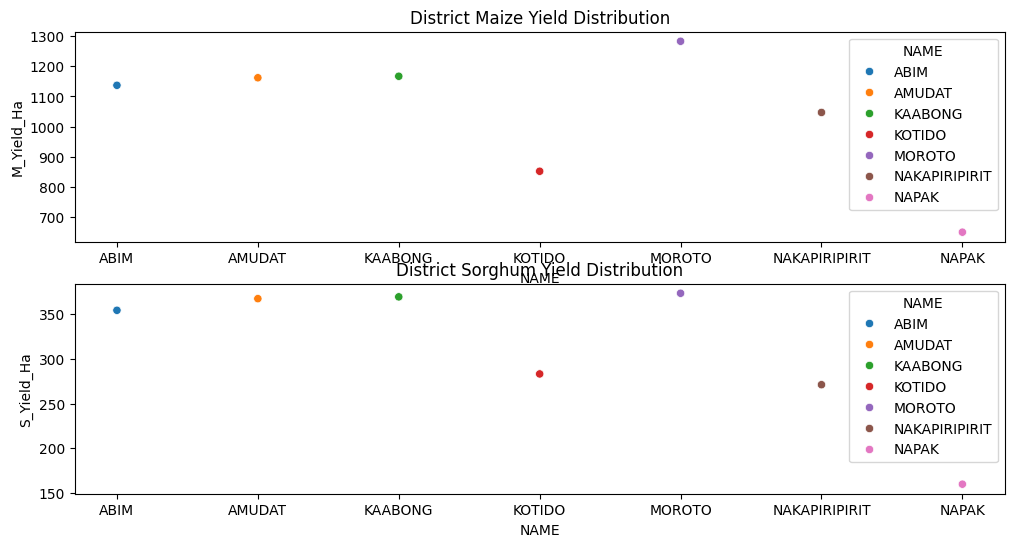

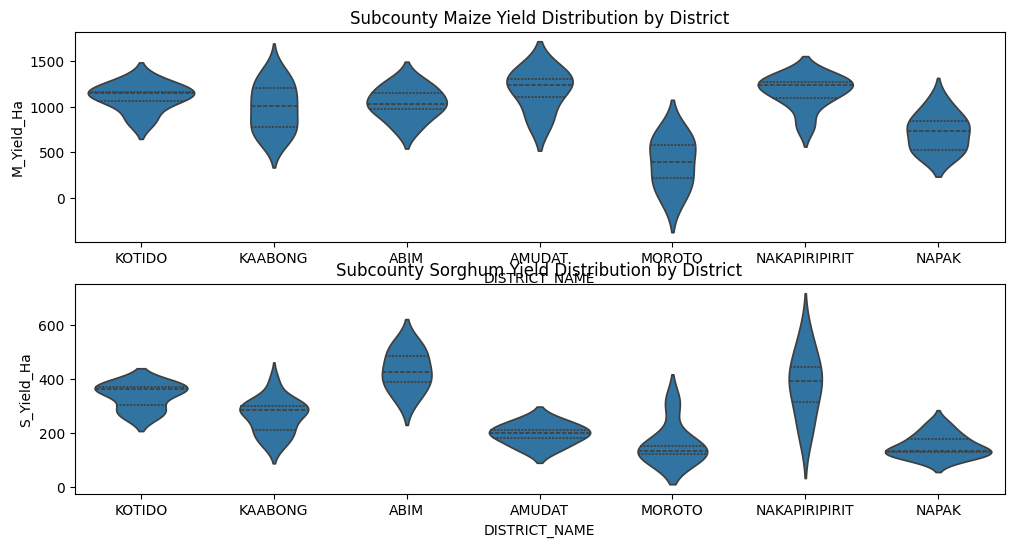

<ipython-input-73-e80cd3d4b674>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


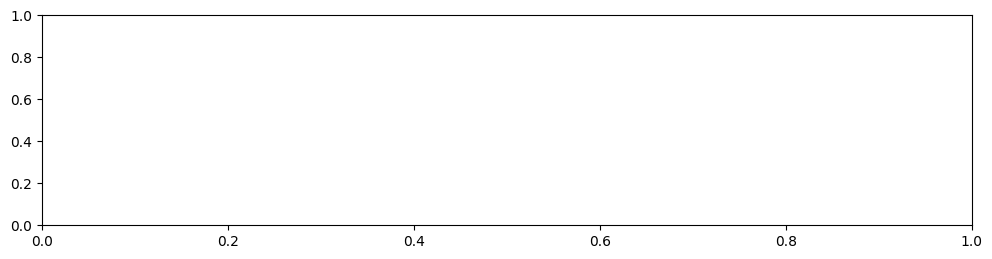

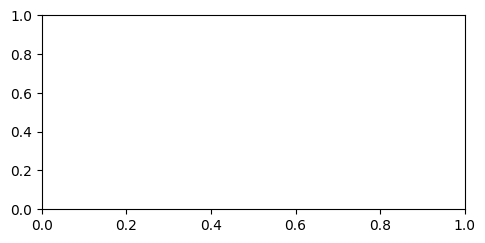

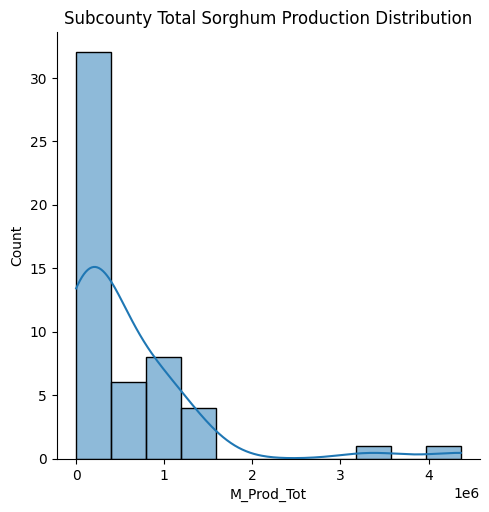

<ipython-input-73-e80cd3d4b674>:36: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


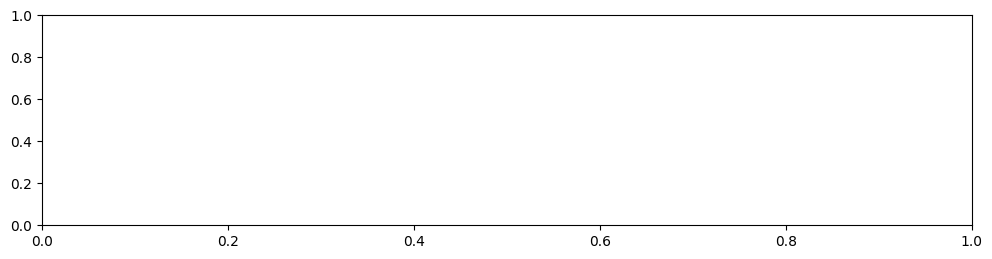

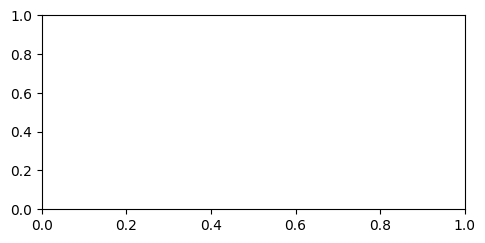

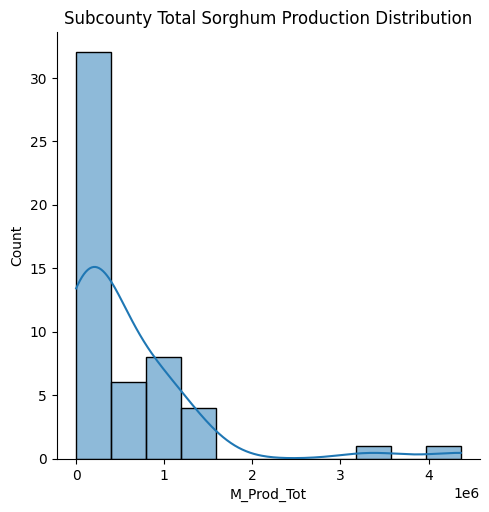

In [ ]:
# Scatter plots for district-level yield (Maize and Sorghum)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.scatterplot(x='NAME', y='M_Yield_Ha', hue='NAME', data=district_data)
plt.title('District Maize Yield Distribution')
plt.subplot(2, 1, 2)
sns.scatterplot(x='NAME', y='S_Yield_Ha', hue='NAME', data=district_data)
plt.title('District Sorghum Yield Distribution')
plt.show()

# Violin plots for subcounty-level yield (Maize and Sorghum)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.violinplot(x='DISTRICT_NAME', y='M_Yield_Ha', inner='quartile', data=subcounty_data)  # Use inner='quartile' for mean line
plt.title('Subcounty Maize Yield Distribution by District')
plt.subplot(2, 1, 2)
sns.violinplot(x='DISTRICT_NAME', y='S_Yield_Ha', inner='quartile', data=subcounty_data)  # Use inner='quartile' for mean line
plt.title('Subcounty Sorghum Yield Distribution by District')
plt.show()

# Distribution plots for district-level total production (Maize and Sorghum)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.displot(subcounty_data['S_Prod_Tot'], kde=True)  # Use displot for density plot
plt.title('Subcounty Total Maize Production Distribution')
plt.subplot(2, 1, 2)
sns.displot(subcounty_data['M_Prod_Tot'], kde=True)  # Use displot for density plot
plt.title('Subcounty Total Sorghum Production Distribution')
plt.show()

# Distribution plots for subcounty-level total production (Maize and Sorghum)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.displot(subcounty_data['S_Prod_Tot'], kde=True)  # Use displot for density plot
plt.title('Subcounty Total Maize Production Distribution')
plt.subplot(2, 1, 2)
sns.displot(subcounty_data['M_Prod_Tot'], kde=True)  # Use displot for density plot
plt.title('Subcounty Total Sorghum Production Distribution')
plt.show()

# **Handling Geospatial data**

In [ ]:
# Load shapefiles
crop_type_map_maize = gpd.read_file("Crop_Type_Map_Maize.shp")
crop_type_map_sorghum = gpd.read_file("Crop_Type_Map_Sorghum.shp")
uganda_districts = gpd.read_file("Uganda_Districts.shp")
uganda_subcounties = gpd.read_file("Uganda_Subcounties.shp")

NOTE: Ensure that you have ***.shp*** with ***.shx, .qpj, .prj, .dbf,*** files stored on the same storage location before loading hence you will have an error.

**Reason:** Each file serves a specific purpose:

*  **.shp:** The main Shapefile that stores the geometric features (points, lines, polygons).
*  **.shx:** The Shapefile index file, which provides rapid access to the features in the **.shp **file.
*   **.qpj:** A Quantum GIS project file, storing project-specific settings like CRS, symbology, and layer visibility.
*   **.prj:** The projection file, defining the Coordinate Reference System (CRS) used by the Shapefile.
*   **.dbf:** A database file that stores attribute data associated with each geometric feature.

The .shp, .shx, .prj, and .dbf files are interconnected. If any of these files are missing or corrupted, it can lead to data inconsistencies or errors when working with the Shapefile.

In [ ]:

# Check for missing values for the shapefiles
print("Missing values in Crop Type Map (Maize):")
print(crop_type_map_maize.isnull().sum())
print("Missing values in Crop Type Map (Sorghum):")
print(crop_type_map_sorghum.isnull().sum())
print("Missing values in Uganda Districts:")
print(uganda_districts.isnull().sum())
print("Missing values in Uganda Subcounties:")
print(uganda_subcounties.isnull().sum())


In [ ]:
# Check for duplicate geometries
print("Duplicate geometries in Crop Type Map (Maize):")
print(crop_type_map_maize.duplicated(subset='geometry').sum())
print("Duplicate geometries in Crop Type Map (Sorghum):")
print(crop_type_map_sorghum.duplicated(subset='geometry').sum())
print("Duplicate geometries in Uganda Districts:")
print(uganda_districts.duplicated(subset='geometry').sum())
print("Duplicate geometries in Uganda Subcounties:")
print(uganda_subcounties.duplicated(subset='geometry').sum())

Duplicate geometries in Crop Type Map (Maize):
0
Duplicate geometries in Crop Type Map (Sorghum):
0
Duplicate geometries in Uganda Districts:
0
Duplicate geometries in Uganda Subcounties:
0


In [ ]:
# Check for inconsistencies in Coordinate Reference System (CRS)
print("CRS of Crop Type Map (Maize):", crop_type_map_maize.crs)
print("CRS of Crop Type Map (Sorghum):", crop_type_map_sorghum.crs)
print("CRS of Uganda Districts:", uganda_districts.crs)
print("CRS of Uganda Subcounties:", uganda_subcounties.crs)


CRS of Crop Type Map (Maize): EPSG:32636
CRS of Crop Type Map (Sorghum): EPSG:32636
CRS of Uganda Districts: EPSG:4326
CRS of Uganda Subcounties: EPSG:4326


In [ ]:
# Check for invalid geometries
print("Invalid geometries in Crop Type Map (Maize):")
print(crop_type_map_maize.is_valid.sum())
print("Invalid geometries in Crop Type Map (Sorghum):")
print(crop_type_map_sorghum.is_valid.sum())
print("Invalid geometries in Uganda Districts:")
print(uganda_districts.is_valid.sum())
print("Invalid geometries in Uganda Subcounties:")
print(uganda_subcounties.is_valid.sum())


Invalid geometries in Crop Type Map (Maize):
27997
Invalid geometries in Crop Type Map (Sorghum):
35945
Invalid geometries in Uganda Districts:
112
Invalid geometries in Uganda Subcounties:
1379


In [ ]:
# Check for overlapping geometries
print("Overlapping geometries in Crop Type Map (Maize):")
print(crop_type_map_maize.overlaps(crop_type_map_maize).sum())
print("Overlapping geometries in Crop Type Map (Sorghum):")
print(crop_type_map_sorghum.overlaps(crop_type_map_sorghum).sum())
print("Overlapping geometries in Uganda Districts:")
print(uganda_districts.overlaps(uganda_districts).sum())
print("Overlapping geometries in Uganda Subcounties:")
print(uganda_subcounties.overlaps(uganda_subcounties).sum())

Overlapping geometries in Crop Type Map (Maize):
0
Overlapping geometries in Crop Type Map (Sorghum):
0
Overlapping geometries in Uganda Districts:
0
Overlapping geometries in Uganda Subcounties:
0


After data cleaning then we go ahead and download the data and load into tableaue for exploration and Visualization

# **Connecting to Data**

STEPS

*   Launch Tableau Desktop or Tableau Server.
*   Click on "Connect" in the left pane.
*   Choose the appropriate data source based on your file format:
        CSV: Select "Text File" or "Excel."
        Shapefile: Select "Spatial File."
* Set up the relationships


The **OBJECTID** column appears in both tables and seems to serve as a unique identifier. Additionally, the **NAME** and **DISTRICT_NAME** columns, which represent district names, are present in both tables. The **OBJECTID** column will be used as the Primary Key in the *Uganda_Karamoja_Subcounty_Crop_Yield_Population* table and as a Foreign Key in the *Uganda_Karamoja_District_Crop_Yield_Population* table to establish a relationship. Moreover, both tables relate to spatial data through the **OBJECTID** column.

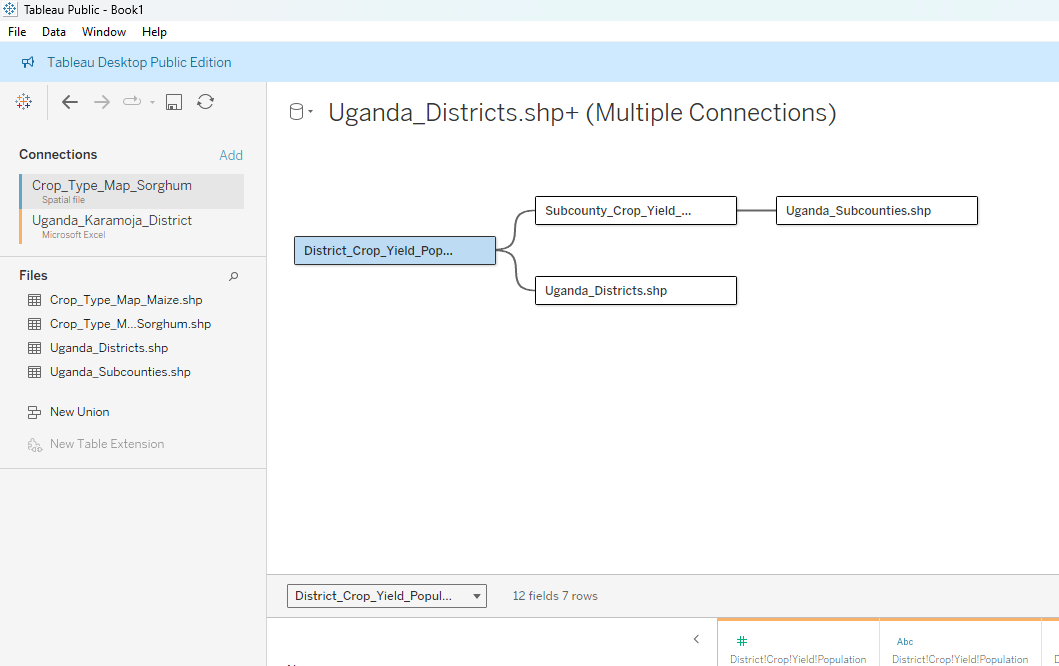

# **Data Analysis & Visualization**

## **Preliminary Exploration**

From the data we can see that;

**Population (POP)**
* Total Population: 1,544,605
* Average Population per District: 220,658
* Median Population: 146,780

Covering an area of (in square meters);

*   Total Area: 27,737,635,624
*   Average Area per District: 3,962,519,375


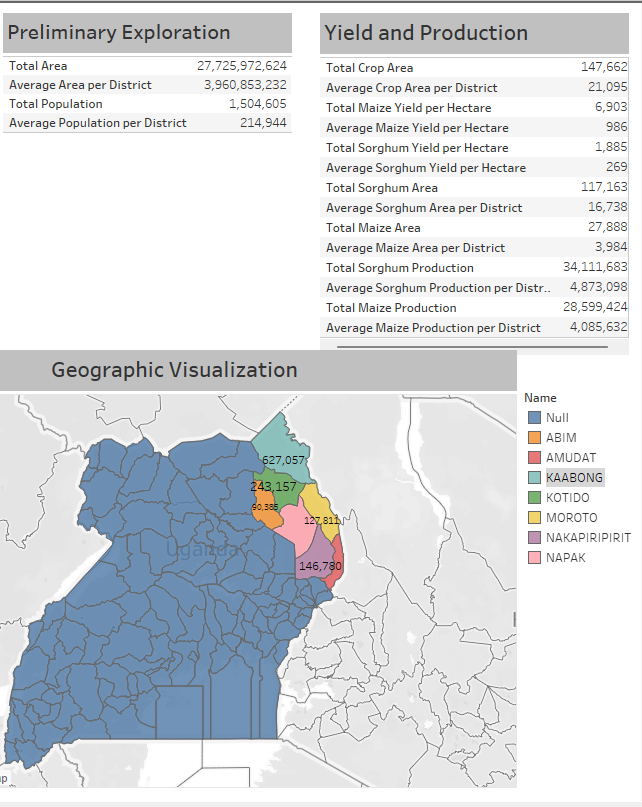

# **YIELD AND PRODUCTION**


## **DISTRICT LEVEL**

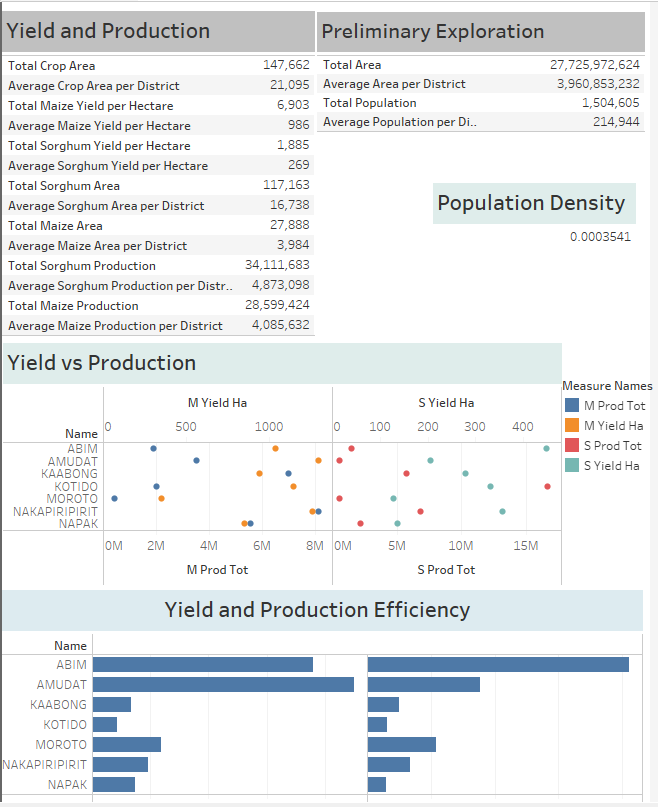

1. **High Yield vs. High Production:** Districts like AMUDAT, KAABONG, KOTIDO, NAKAPIRIPIRIT, and NAPAK show high production values, with NAKAPIRIPIRIT and KOTIDO having particularly high production despite varying yield levels. Due to large cultivated areas, KAABONG and KOTIDO achieve high production with moderate yields.
2. **Low Yield Impact:** Districts with low yields, such as ABIM and MOROTO, tend to have lower overall production figures. However, ABIM's production is bolstered by a substantial area under cultivation.

3. Districts exhibit significant differences in yield between seasons. The M_Yield_Ha season often shows higher yields compared to S_Yield_Ha, impacting the total production.

From the data higher production is associated with larger cultivated areas and, in some cases, better yields, but even moderate yields can result in substantial production if the area is large enough



##**SUB-COUNTY LEVEL**

**Regional Production and Yield Analysis:**

In the Karamoja region, agricultural yields are notably lower compared to other regions. Despite this, there are subcounties within this region that stand out with higher production figures. For instance, PANYANGARA and RENGEN report some of the highest production levels, indicating that while average yields might be low, certain areas have managed to achieve impressive production outputs.


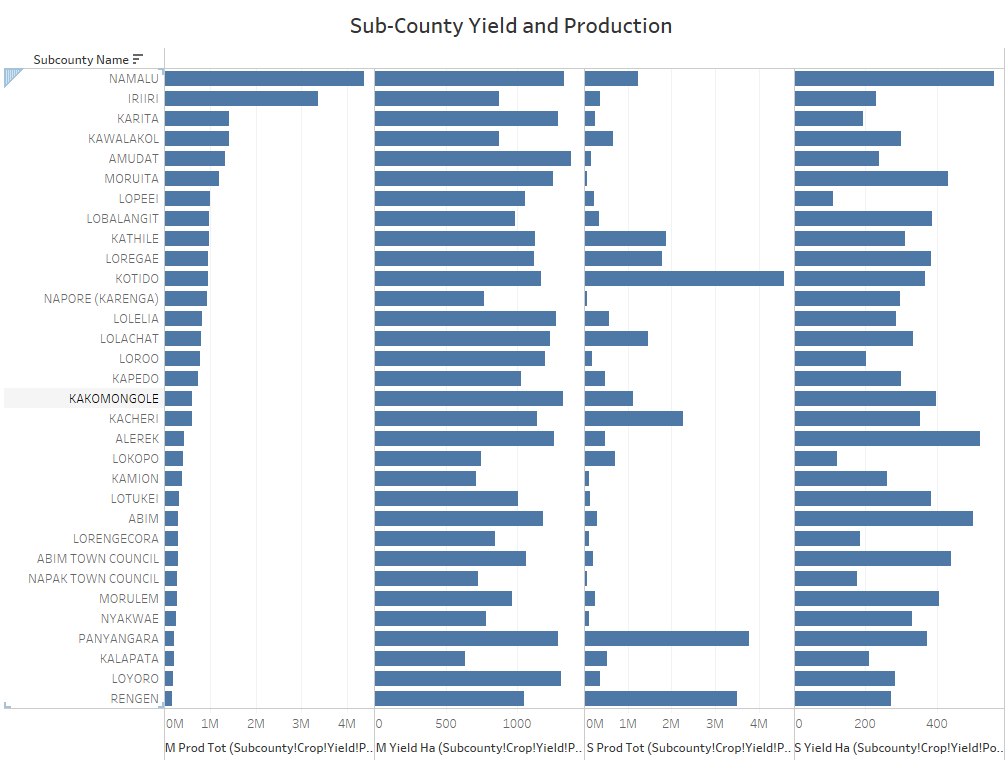

Moving to the Kaabong District, the data reveals a diverse range of yields and production levels. Subcounties like KAWALAKOL and KATHILE exhibit particularly high production figures. This variation suggests that while the overall performance might fluctuate, there are specific areas where agricultural practices or conditions lead to significantly better outcomes.
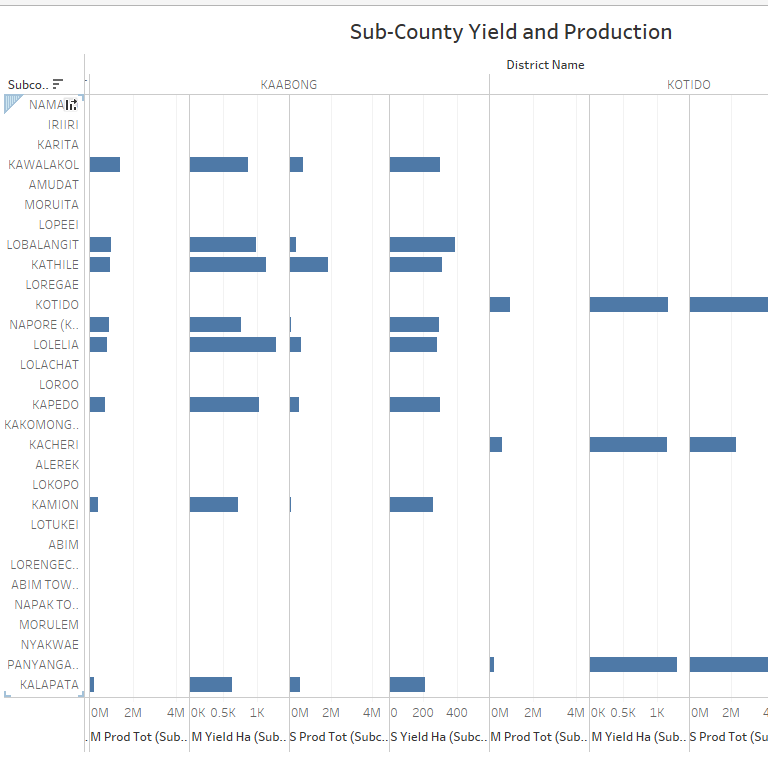


In the Moroto District, the trend shows generally lower yields across most subcounties. However, this district still sees high production in certain areas, such as RUPA. This indicates that even with lower yields, effective crop management or larger crop areas can still lead to substantial production totals.

**Yield and Production Variability:**

The highest yields are observed in NAMALU, located in NAKAPIRIPIRIT. This subcounty leads both in seasonal and monthly yield per hectare, reflecting optimal agricultural conditions or practices. On the other hand, the lowest yields are found in the SOUTHERN DIVISION of MOROTO. This suggests that this subcounty may face challenges such as poor soil quality, limited irrigation, or other factors that hinder agricultural productivity.

**Subcounty Performance:**

Among the top-performing subcounties, NAMALU in NAKAPIRIPIRIT stands out due to its exceptional yield levels. KAWALAKOL in KAABONG and RUPA in MOROTO also show strong performance in terms of production. These subcounties not only achieve high yields but also contribute significantly to overall production, marking them as key areas of success in the dataset.

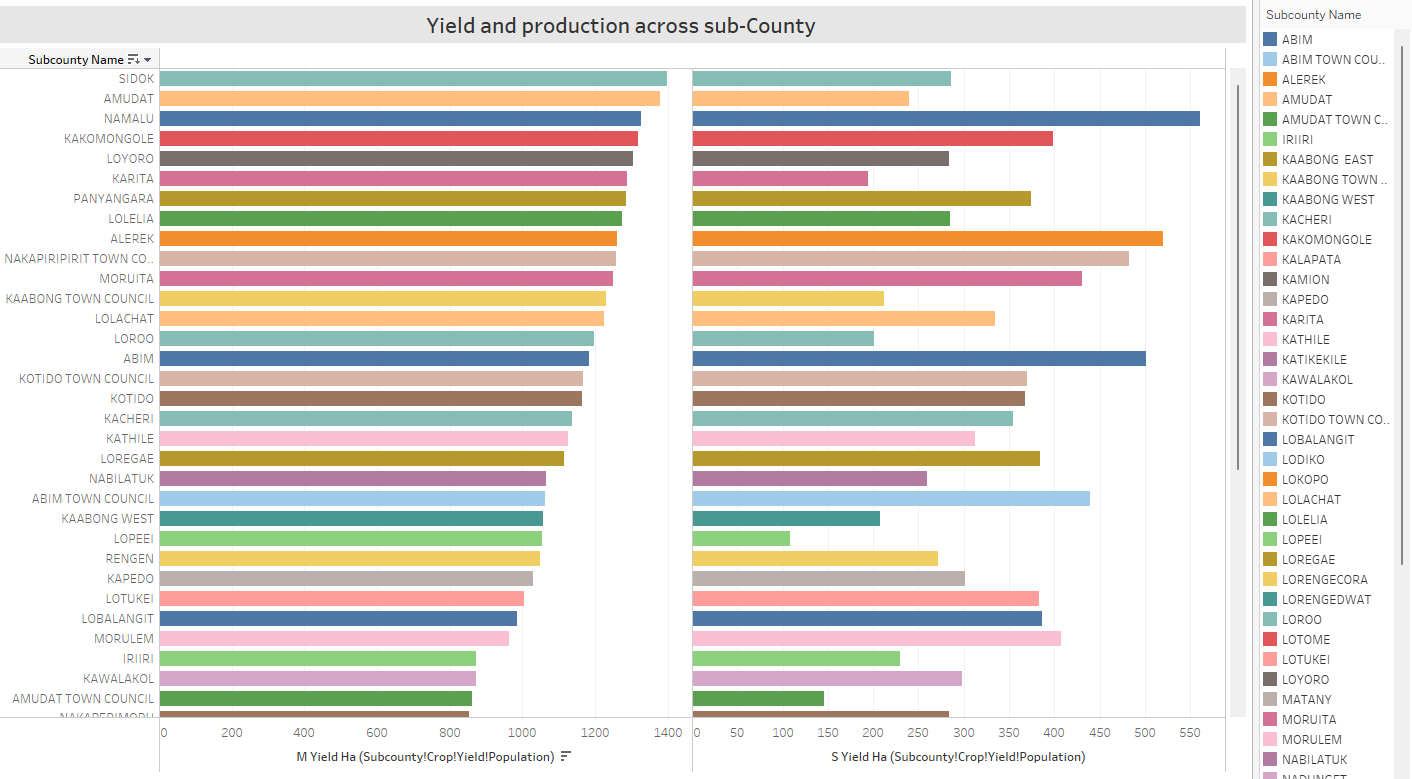


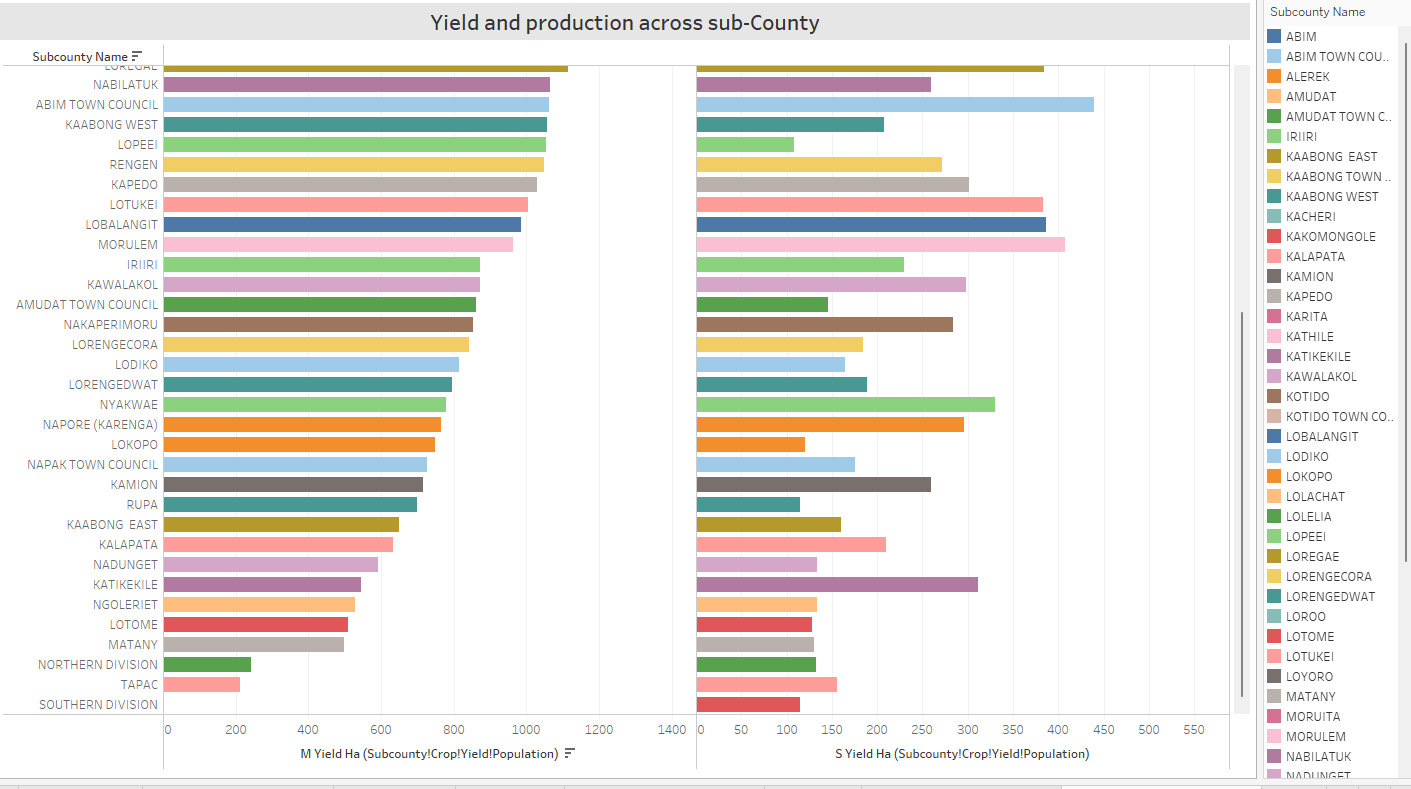

Conversely, the SOUTHERN DIVISION and NORTHERN DIVISION in MOROTO appear to be underperforming. These subcounties have lower yields and production figures, which may be indicative of underlying issues such as resource limitations, environmental constraints, or less effective agricultural practices.



# **Combined District and Subcounty**

**Regional Overview:**

When analyzing both district and subcounty data, the Karamoja region reveals significant disparities in agricultural performance. While the region is generally known for lower yields, specific subcounties within each district stand out for their high production levels, indicating pockets of successful agricultural activity.

**District and Subcounty Performances:**

Kaabong District emerges as a key area with substantial variation across its subcounties. KAWALAKOL and KATHILE demonstrate particularly high production, driven by relatively larger crop areas and effective farming techniques. However, the district also contains subcounties like LODIKO, which exhibit much lower yields, suggesting challenges such as less fertile land or inadequate farming practices.

Kotido District shows a mix of performance across its subcounties. KOTIDO TOWN COUNCIL stands out with a high yield per hectare, reflecting efficient use of available land, whereas other subcounties like NAKAPERIMORU show lower yields but still manage decent production levels due to larger crop areas.

Moroto District is characterized by generally lower yields, with both NORTHERN DIVISION and SOUTHERN DIVISION underperforming. Despite this, RUPA stands out with high production, indicating that certain subcounties are leveraging their resources more effectively despite the overall trend of low yields.

Nakapiripirit District shows the highest yield values in subcounties like NAMALU. This subcounty not only leads in yield per hectare but also in total production, making it a critical area for agricultural output in the region. However, subcounties like LORENGEDWAT show much lower yields, indicating a need for targeted interventions to enhance productivity.

Abim District presents a varied picture as well. Subcounties like ALEREK and LOTUKEI show higher yield values, but production levels vary widely, suggesting differences in land use efficiency or external factors affecting crop performance.

Amudat District is another area where certain subcounties like KARITA and LOROO exhibit high production levels despite moderate yields. This indicates that these subcounties are effectively utilizing their crop areas, contributing significantly to the district's overall agricultural output.

# **Conclusion and recommendations**

## **Conclusion:**
The analysis of agricultural performance across districts and sub-counties in the Karamoja region reveals significant variability in crop yields and production levels. The key drivers of success appear to be effective land use and crop management practices, which allow these some areas to achieve higher productivity despite regional constraints.

## **Business Recommendations**
**Targeted Agricultural Support Programs:**
**Expand successful practices:** Agricultural practices from high-performing sub counties like NAMALU and KAWALAKOL should be studied and promoted across other regions. Providing training and resources to replicate these methods in lower-performing areas could boost overall regional productivity.

**Focus on Land Use Optimization:**
**Improve crop area management: **Given the significant impact of effective land use on production, there should be a focus on optimizing the crop areas in underperforming regions. This could involve land rehabilitation, better irrigation practices, or the introduction of high-yield crop varieties.

**Resource Allocation and Investment:**
**Invest in low-performing sub-counties:** Areas like SOUTHERN DIVISION and NORTHERN DIVISION in Moroto should receive targeted investments, including improved agricultural inputs, infrastructure, and extension services, to address the specific challenges they face and uplift their production levels.

**Scale Successful Interventions:**
**Broaden successful initiatives:** Programs that have proven successful in sub-counties with high yields and production should be expanded to neighboring districts. This includes promoting high-yield seeds, better pest management, and modern farming techniques.

**Monitoring and Continuous Improvement:**
**Establish regular monitoring:** Regular monitoring of agricultural performance across all sub counties should be implemented to track progress, identify emerging challenges, and continuously adapt strategies. Data-driven decisions will ensure that interventions remain effective and resources are allocated efficiently.

# **Future Work**


1. Temporal trends in crop yields and production.

2. Impact of socioeconomic factors on agricultural outcomes.

3. Predictive modeling for future crop yields and production.

4. Impact assessment of agricultural interventions.

5. Supply chain and market access analysis.

6. Environmental impact of current agricultural practices.
